# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

    Do the users spend more time on the new landing page than on the existing landing page?
    Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
    Does the converted status depend on the preferred language?
    Is the time spent on the new page the same for the different language users?


## Import all the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head(25)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


In [4]:
df.shape

(100, 6)

In [5]:
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [6]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are not missing values in the data

In [7]:
for x in df.columns:
    print(f'{x} column has {df[x].nunique()} unique values')

user_id column has 100 unique values
group column has 2 unique values
landing_page column has 2 unique values
time_spent_on_the_page column has 94 unique values
converted column has 2 unique values
language_preferred column has 3 unique values


### Univariate Analysis

#### user_id

In [8]:
users = df['user_id'].unique()
users.sort()
print('the user_id variable is made up of 100 user ids that corriespond to each unique user')
print(users)


the user_id variable is made up of 100 user ids that corriespond to each unique user
[546443 546444 546445 546446 546447 546448 546449 546450 546451 546452
 546453 546454 546455 546456 546457 546458 546459 546460 546461 546462
 546463 546464 546465 546466 546467 546468 546469 546470 546471 546472
 546473 546474 546475 546476 546477 546478 546479 546480 546481 546482
 546483 546484 546485 546486 546487 546488 546489 546490 546491 546492
 546493 546544 546545 546546 546547 546548 546549 546550 546551 546552
 546553 546554 546555 546556 546557 546558 546559 546560 546561 546562
 546563 546564 546565 546566 546567 546568 546569 546570 546571 546572
 546573 546574 546575 546576 546577 546578 546579 546580 546581 546582
 546583 546584 546585 546586 546587 546588 546589 546590 546591 546592]


#### group

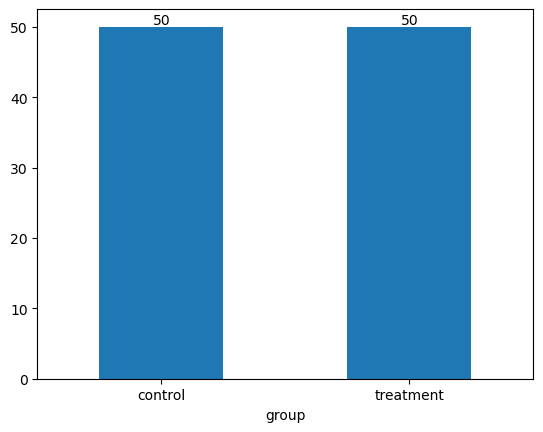

The group variable is made up of a 2 catergorial values 'control' and 'treatment' of equal counts


In [9]:
ax = df['group'].value_counts().plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=0)
plt.show()
print('The group variable is made up of a 2 catergorial values \'control\' and \'treatment\' of equal counts')

#### landing_page

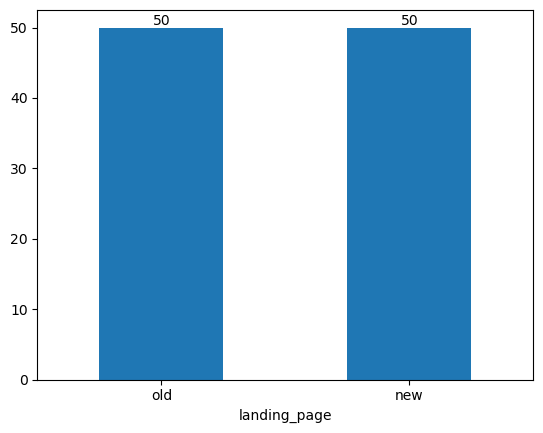

As expected, the landing_page variable mirrors the group variable


In [10]:
ax = df['landing_page'].value_counts().plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
    
plt.xticks(rotation=0)
plt.show()
print('As expected, the landing_page variable mirrors the group variable')

#### time_spent_on_the_page

In [11]:
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

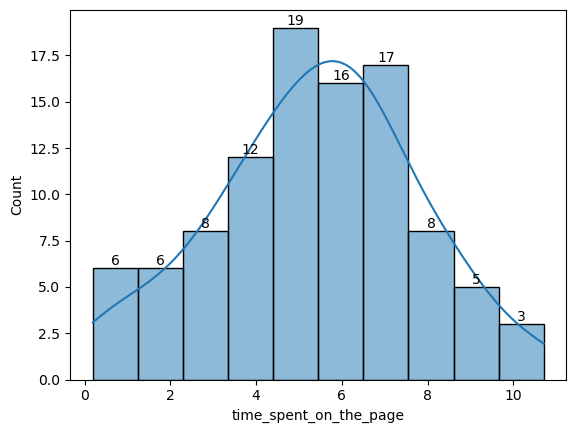

The average time spent on the landing page was 5.38
The time_spent_on_the_page variable looks normally distributed


In [12]:
ax = sns.histplot(data=df, x=df['time_spent_on_the_page'], kde=True, bins=10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()
print(f'The average time spent on the landing page was {round(df["time_spent_on_the_page"].mean(), 2)}\n'
'The time_spent_on_the_page variable looks normally distributed')

#### converted

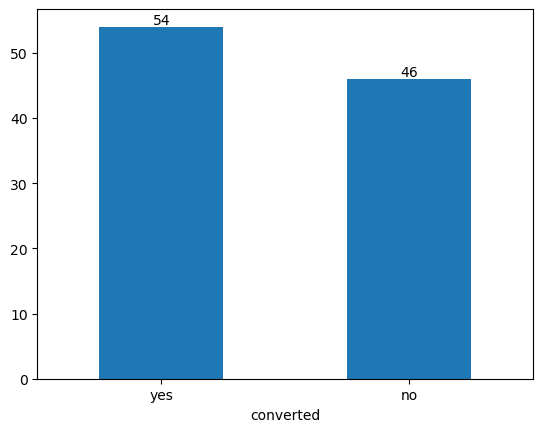

The converted variable is a categorical 'yes' or 'no' value. There 54 users that were converted


In [13]:
ax = df['converted'].value_counts().plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container)
    
plt.xticks(rotation=0)
plt.show()
print('The converted variable is a categorical \'yes\' or \'no\' value. There 54 users that were converted')

#### language_preferred

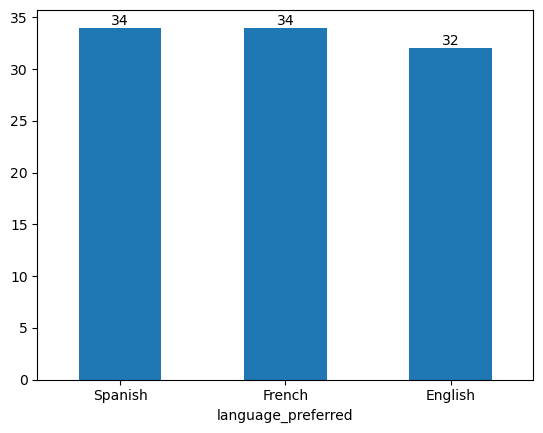

The language_preferred variable is categorical. The 3 languages are very close to being equal in count, with english being the smallest by 2 users.


In [14]:
ax = df['language_preferred'].value_counts().plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
    
plt.xticks(rotation=0)
plt.show()
print('The language_preferred variable is categorical. The 3 languages are very close to being equal in count, with english being the smallest by 2 users.')

### Bivariate Analysis

#### group vs time_spent_on_the_page

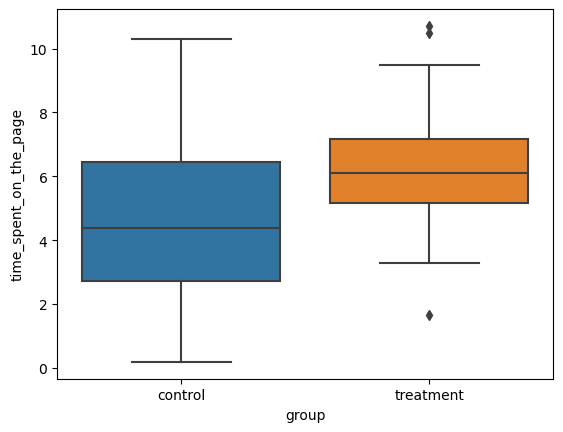

The control group's mean time is 4.53. The treatment group's mean time is 6.22


In [15]:
sns.boxplot(data=df, x='group', y='time_spent_on_the_page')
plt.show()
print(f'The control group\'s mean time is {round(df[df["group"] == "control"]["time_spent_on_the_page"].mean(), 2)}. The treatment group\'s mean time is {round(df[df["group"] == "treatment"]["time_spent_on_the_page"].mean(), 2)}')


#### group vs converted

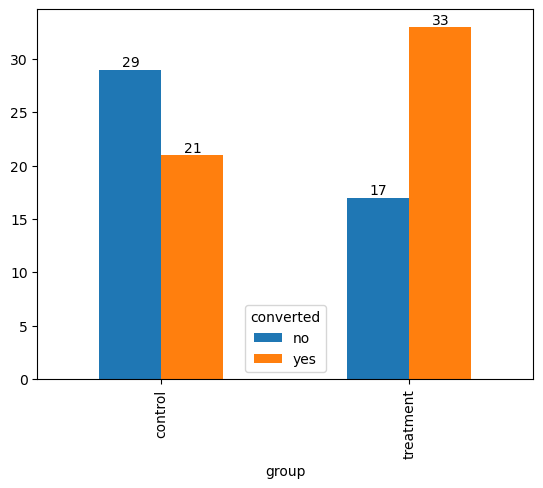

The control group had of their users that were not converted. The treatment group has more of their users that were converted.


In [16]:
ax = df.groupby('group')['converted'].value_counts().unstack().plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)

plt.show()
print('The control group had of their users that were not converted. The treatment group has more of their users that were converted.')

#### group vs language_preferred

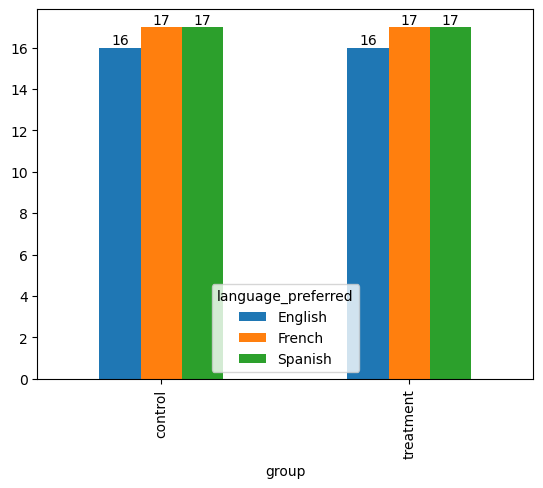

Both groups had the same amount of users that preferred English, French, and Spanish.


In [17]:
ax = df.groupby('group')['language_preferred'].value_counts().unstack().plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)

plt.show()
print('Both groups had the same amount of users that preferred English, French, and Spanish.')

#### landing_page vs time_spent_on_the_page

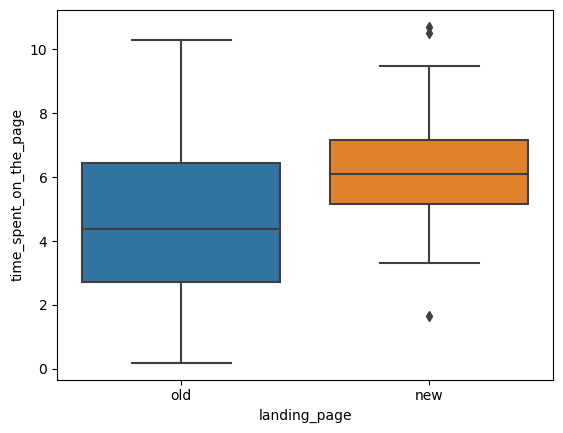

The users mean time on the old landing page is 4.53. The users mean time on the old landing page is 6.22
As to be expected, this mirrors what we found when we analyzed group vs time_spent_on_the_page


In [18]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()
print(f'The users mean time on the old landing page is {round(df[df["landing_page"] == "old"]["time_spent_on_the_page"].mean(), 2)}. The users mean time on the old landing page is {round(df[df["landing_page"] == "new"]["time_spent_on_the_page"].mean(), 2)}')
print('As to be expected, this mirrors what we found when we analyzed group vs time_spent_on_the_page')

#### landing_page vs converted

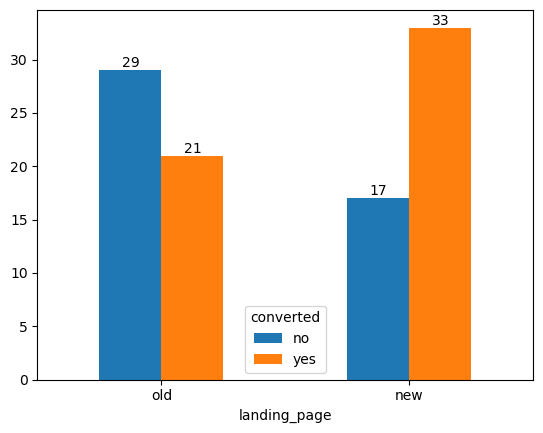

The old group had more of their users that were not converted. The new group has more of their users that were converted.
As to be expected, this mirrors what we found when we analyzed group vs converted


In [19]:
order=['old', 'new']
ax = df.groupby('landing_page')['converted'].value_counts().unstack().loc[order].plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=0)
plt.show()
print('The old group had more of their users that were not converted. The new group has more of their users that were converted.')
print('As to be expected, this mirrors what we found when we analyzed group vs converted')

#### landing_page vs language_preferred

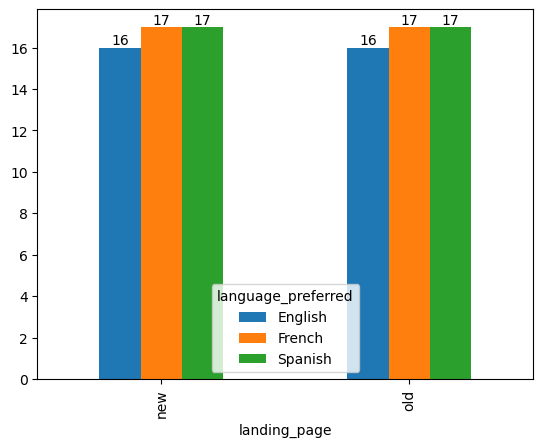

Both groups had the same amount of users that preferred English, French, and Spanish.
As to be expected, this mirrors what we found when we analyzed group vs converted


In [20]:
ax = df.groupby('landing_page')['language_preferred'].value_counts().unstack().plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)

plt.show()
print('Both groups had the same amount of users that preferred English, French, and Spanish.')
print('As to be expected, this mirrors what we found when we analyzed group vs converted')

#### time_spent_on_the_page vs converted

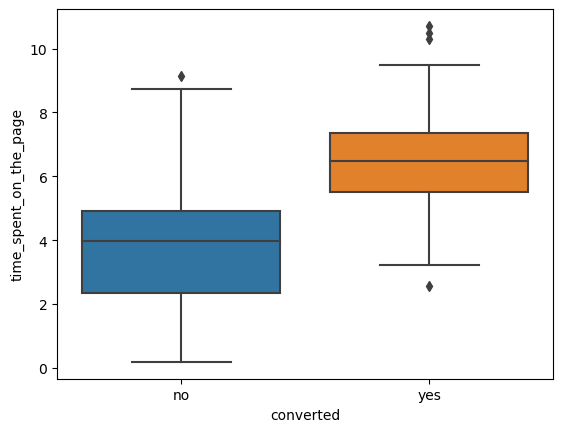

The non-converted users mean time on the landing page is 3.92. The converted users mean time on the landing page is 6.62


In [21]:
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page')
plt.show()
print(f'The non-converted users mean time on the landing page is {round(df[df["converted"] == "no"]["time_spent_on_the_page"].mean(), 2)}. The converted users mean time on the landing page is {round(df[df["converted"] == "yes"]["time_spent_on_the_page"].mean(), 2)}')

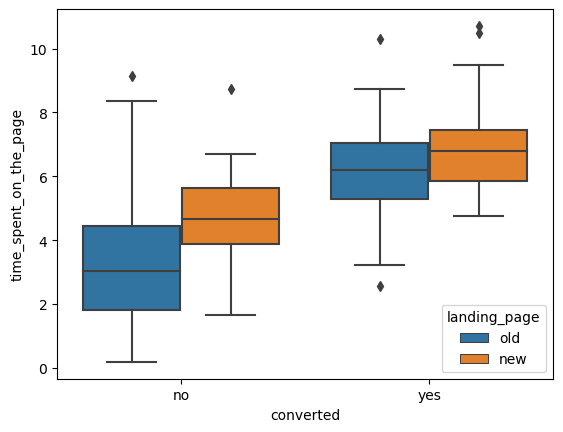

Both non-converted users and converted users spend more time on the new landing page.


In [22]:
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', hue='landing_page')
plt.show()
print('Both non-converted users and converted users spend more time on the new landing page.')

#### time_spent_on_the_page vs language_preferred

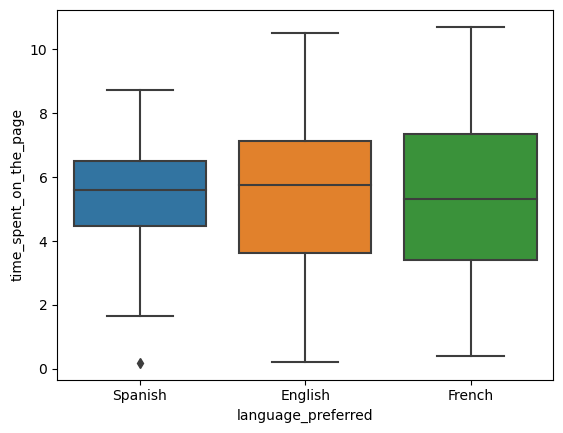

The English language users mean time on the landing page is 5.56.
The French language users mean time on the landing page is 5.25.
The Spanish language users mean time on the landing page is 5.33


In [23]:
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.show()
print(f'The English language users mean time on the landing page is {round(df[df["language_preferred"] == "English"]["time_spent_on_the_page"].mean(), 2)}.\nThe French language users mean time on the landing page is {round(df[df["language_preferred"] == "French"]["time_spent_on_the_page"].mean(), 2)}.\nThe Spanish language users mean time on the landing page is {round(df[df["language_preferred"] == "Spanish"]["time_spent_on_the_page"].mean(), 2)}')


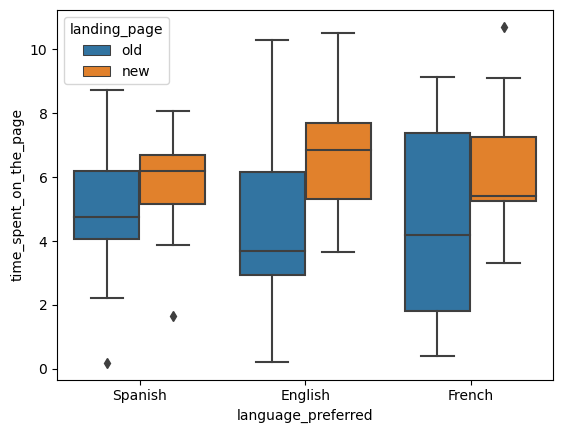

The mean time spent on the new landing page is higher for all languages. English had the highest mean time
English users mean time was 6.66
French users mean time was 6.2
Spanish users mean time was 5.84



In [24]:
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='landing_page')
plt.show()
print(f"The mean time spent on the new landing page is higher for all languages. English had the highest mean time\n"
      f"English users mean time was {round(df[(df['language_preferred'] == 'English') & (df['landing_page'] == 'new')]['time_spent_on_the_page'].mean(), 2)}\n"
      f"French users mean time was {round(df[(df['language_preferred'] == 'French') & (df['landing_page'] == 'new')]['time_spent_on_the_page'].mean(), 2)}\n"
      f"Spanish users mean time was {round(df[(df['language_preferred'] == 'Spanish') & (df['landing_page'] == 'new')]['time_spent_on_the_page'].mean(), 2)}\n")


#### converted vs language_preferrred

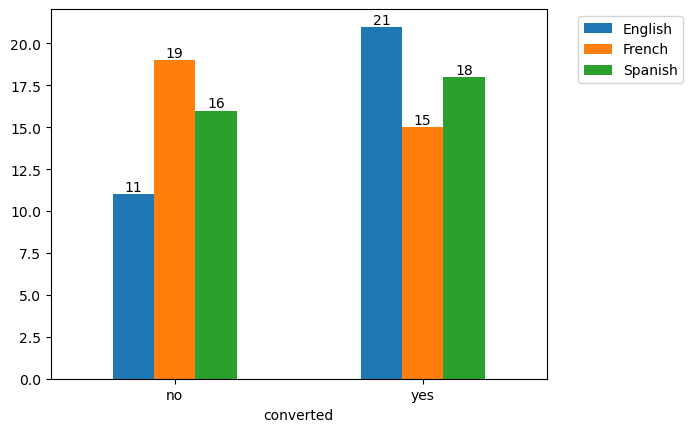

French users were the least converted. Engliush users were the most converted.


In [25]:
ax = df.groupby('converted')['language_preferred'].value_counts().unstack().plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()
print('French users were the least converted. Engliush users were the most converted.')


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

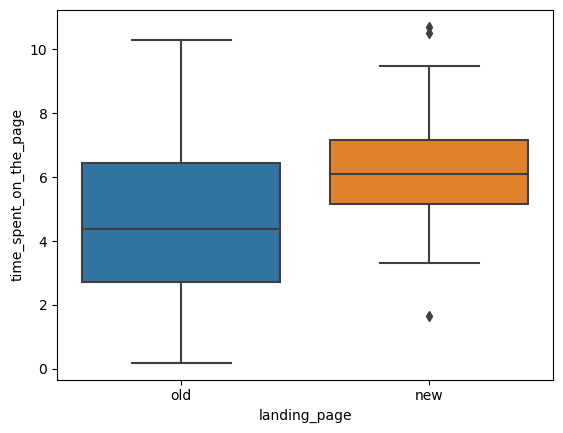

Users spend more time on the new landing page.
Old Sample mean: 4.53
New Sample mean: 6.22
Old sample standard deviation 2.581974849306046
New sample standard deviation 1.8170310387878263


In [33]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()

old_mu = df[df["landing_page"] == "old"]["time_spent_on_the_page"].mean()
new_mu = df[df["landing_page"] == "new"]["time_spent_on_the_page"].mean()
old_sigma = df[df["landing_page"] == "old"]["time_spent_on_the_page"].std()
new_sigma = df[df["landing_page"] == "new"]["time_spent_on_the_page"].std()

print('Users spend more time on the new landing page.')
print('Old Sample mean:', round(old_mu, 2))
print('New Sample mean:', round(new_mu, 2))
print(f'Old sample standard deviation {old_sigma}')
print(f'New sample standard deviation {new_sigma}')

C:\Users\Daniel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


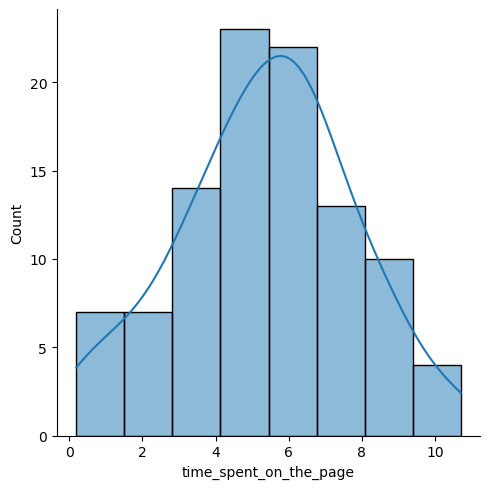

In [27]:
sns.displot(df.time_spent_on_the_page, kde=True)
plt.show()

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: Users spend the same amount of time on the new landing page as they did on the old landing page.
>$H_0:\mu_n = \mu_o$

Alternative Hypothesis: Users spend more time on the new landing page than they did on the old landing page.
>$H_a:\mu_n > \mu_o$


### Step 2: Select Appropriate test

Two Independent Sample T-test for Equality of Means

Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes, the sample size is > 30 and looks normally distributed.
* Independent populations - As we are taking 100 random samples and spliting them in to two different groups, the samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.


### Step 3: Decide the significance level

As stated in the objectives, $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [61]:
alpha = 0.05
old_group = df[df['landing_page'] == 'old']['time_spent_on_the_page']
new_group = df[df['landing_page'] == 'new']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [62]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(new_group, old_group, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [64]:
if (p_value < alpha ):
    print('True')
else:
    print('False')

True


### Step 7:  Draw inference

As the p-value (~0.0001) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that users spend more time on the new landing page than the old landing page. 

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

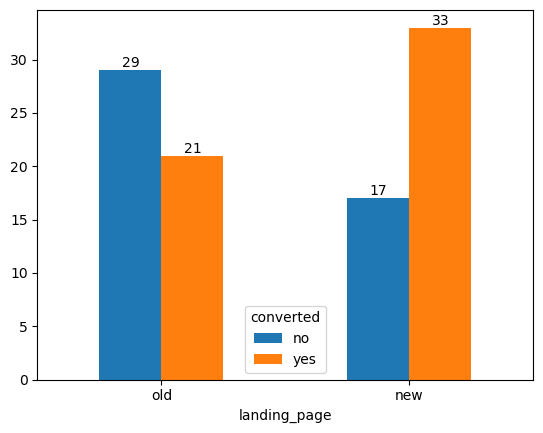

In [65]:
order=['old', 'new']
ax = df.groupby('landing_page')['converted'].value_counts().unstack().loc[order].plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=0)
plt.show()

### Step 1: Define the null and alternate hypotheses


Null Hypothesis: The conversion rate for the new page is equal to the old page
>$H_0:p_n = p_o$

Alternative Hypothesis: The conversion rate for the new page is greater than the old page
>$H_a:p_n > p_o$


### Step 2: Select Appropriate test

Two Proportion Z-test

Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_n = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_n) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_o = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_o) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $


### Step 3: Decide the significance level

As stated in the objectives, $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [131]:
converted_count = np.array([33, 21])

nobs = np.array([50, 50])


### Step 5: Calculate the p-value

In [71]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest(converted_count, nobs, alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [74]:
if (p_value < alpha ):
    print('True')
else:
    print('False')

True


### Step 7:  Draw inference

As the p-value (~0.008) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the converstion rate of the new page is greater than the old page.

## 3. Is the conversion and preferred language are independent or related?

In [75]:
pd.crosstab(df['converted'],df['language_preferred'])

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 1: Define the null and alternate hypotheses

Null Hypothesis: The conversion rate for the new page is equal to the old page
>$H_0:$Conversion is independent of Preferred Language

Alternative Hypothesis: The conversion rate for the new page is greater than the old page
>$H_a:$Conversion is not independent of Preferred Language


### Step 2: Select Appropriate test

Chi-Square Test for Independence

Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 3: Decide the significance level

As stated in the objectives, $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [82]:
observed = pd.crosstab(df['converted'],df['language_preferred'])

### Step 5: Calculate the p-value

In [83]:
# import the required function
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(observed)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [80]:
if (p_value < alpha ):
    print('True')
else:
    print('False')

False


### Step 7:  Draw inference

As the p-value is much greater then the significance level, we fail to reject the null hypothesis. Hence, conversion is independent of preferred language

## 4. Is the time spent on the new page same for the different language users?

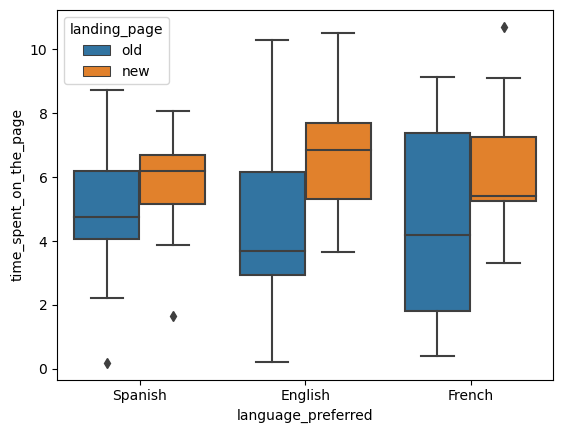

In [96]:
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='landing_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: The mean time spent on the new page is the same for the different language users.
>$H_0:\mu_e = \mu_f = \mu_s$

Alternative Hypothesis: The mean time spent ont he new page is different for the different language users.
>$H_a:\mu_e \neq \mu_f \neq \mu_s$ (Atleast one of the means is not the same)

### Step 2: Select Appropriate test

One-way ANOVA F-Test 

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The time spent on new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on new page does not follow a normal distribution

In [119]:
time_new = df['time_spent_on_the_page'][df['landing_page'] == 'new']

w, p_value = stats.shapiro(time_new) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is large, we fail to reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [122]:
from scipy.stats import levene
statistic, p_value = levene( df[(df['language_preferred']=='English') & (df['landing_page'] == 'new')]['time_spent_on_the_page'], 
                                   df[(df['language_preferred']=='French') & (df['landing_page'] == 'new')]['time_spent_on_the_page'], 
                                   df[(df['language_preferred']=='Spanish') & (df['landing_page'] == 'new')]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


### Step 3: Decide the significance level

As stated in the objectives, $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [129]:
english = df[(df['language_preferred']=='English') & (df['landing_page'] == 'new')]['time_spent_on_the_page']
french = df[(df['language_preferred']=='French') & (df['landing_page'] == 'new')]['time_spent_on_the_page']
spanish = df[(df['language_preferred']=='Spanish') & (df['landing_page'] == 'new')]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [130]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(english, french, spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [110]:
if (p_value < alpha ):
    print('True')
else:
    print('False')

False


### Step 7:  Draw inference

As the p-value is much higher than the significance level, we fail to reject the null hypothesis. Hence, we can conclude that the mean time spent on the new landing page is the same for all language users.

## Conclusion and Business Recommendations

### Conclusions
* Users spend more time on the new landing page than on the old landing page.
* The conversion rate for the new page is greater than the conversion rate for the old page.
* Converted status does not depend on the preferred language.
* The time spent on the new page was not statistically significant between the differnt language users.

### Buiness Recommendations
* The new landing page has shown to increase time on the landing page and increase subscribers. The new page should go to all users.

___